In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [9]:
s = "   "

In [10]:
s.isspace()

True

In [11]:
s = ""

In [12]:
s.isspace()

False

In [15]:
df = df[~df["review"].str.isspace()]

In [16]:
df[df["review"].apply(lambda x: x=="")]

,label,review


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [18]:
df["label"].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
count_vectorizer = CountVectorizer(stop_words='english')

In [22]:
matrix = count_vectorizer.fit_transform(df[df["label"]=='neg']['review'])

In [27]:
freqs = zip(count_vectorizer.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])

In [28]:
print(sorted(freqs, key=lambda tup: -tup[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [29]:
matrix = count_vectorizer.fit_transform(df[df["label"]=='pos']['review'])
freqs = zip(count_vectorizer.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
print(sorted(freqs, key=lambda tup: -tup[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [30]:
X = df["review"]
y = df["label"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
from sklearn.svm import LinearSVC

In [36]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LinearSVC())
])

In [37]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LinearSVC())])

In [38]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [39]:
predictions = pipe.predict(X_test)

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



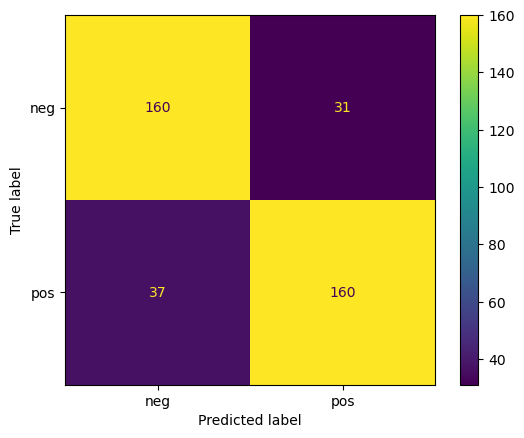

In [40]:
print(classification_report(y_test, predictions))
ConfusionMatrixDisplay.from_predictions(y_test, predictions)